In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/HMKMRHD.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [147]:
Basic_dir = os.path.dirname(os.path.dirname(os.path.realpath('EDA.ipynb')))
PATH = Basic_dir + '\\Data\\Data(PenW_B)'
os.listdir(PATH)

['sample_submission.csv', 'test.csv', 'train.csv']

In [148]:
train = pd.read_csv(PATH + '\\train.csv')
print(train.columns)
train.head()

Index(['id', 'Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Body Mass (g)'],
      dtype='object')


,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


In [150]:
# 결측값이 있는 행
for i in range(len((train.isna().sum(axis=1)>=1))):
    if (train.isna().sum(axis=1)>=1)[i] == True:
        print(i)

6
8
18
70
109


In [151]:
# 누락값 상세 확인
null_list = [6, 8, 18, 70, 109]
train.iloc[null_list, :]

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [152]:
# na 값 삭제
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)

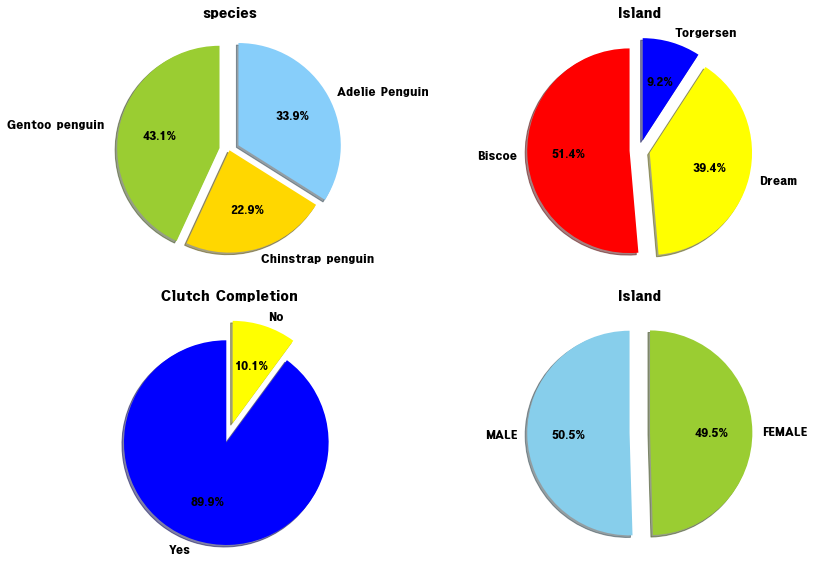

In [153]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8), sharey = True)

ax = axes[0, 0]
sp_list = list(train.Species.unique())
sp_list_ch = []
for sp in sp_list:
    sp_list_ch.append(sp.split('(')[0])
sp_sizes = []
for i in range(len(sp_list)):
    globals()[f'sp_list_value{i}'] = len(train[train.Species == sp_list[i]].Species)
    sp_sizes.append(globals()[f'sp_list_value{i}'])
# 파이차트 : 카테고리별 값의 상대적인 비교를 해야할 때 사용
labels = sp_list_ch
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0.1, 0, 0.1)
ax.pie(sp_sizes, explode = explode, labels = labels, colors = colors,
       autopct = '%1.1f%%', shadow = True, startangle = 90)
ax.set_title('species')

ax = axes[0, 1]
land_list = list(train.Island.unique())
land_sizes = []
for i in range(len(sp_list)):
    globals()[f'land_list_value{i}'] = len(train[train.Island == land_list[i]].Island)
    land_sizes.append(globals()[f'land_list_value{i}'])
# 파이차트 : 카테고리별 값의 상대적인 비교를 해야할 때 사용
labels = list(train.Island.unique())
colors = ['red', 'yellow', 'blue']
explode = (0.1, 0.1, 0.1)
ax.pie(land_sizes, explode = explode, labels = labels, colors = colors,
       autopct = '%1.1f%%', shadow = True, startangle = 90)
ax.set_title('Island')

ax = axes[1, 0]
CC_list = list(train['Clutch Completion'].unique())
CC_sizes = []
for i in range(len(CC_list)):
    globals()[f'CC_list_value{i}'] = len(train[train['Clutch Completion'] == CC_list[i]]['Clutch Completion'])
    CC_sizes.append(globals()[f'CC_list_value{i}'])
# 파이차트 : 카테고리별 값의 상대적인 비교를 해야할 때 사용
labels = list(train['Clutch Completion'].unique())
colors = ['blue', 'yellow']
explode = (0.1, 0.1)
ax.pie(CC_sizes, explode = explode, labels = labels, colors = colors,
       autopct = '%1.1f%%', shadow = True, startangle = 90)
ax.set_title('Clutch Completion')

ax = axes[1, 1]
sex_list = list(train.Sex.unique())
sex_sizes = []
for i in range(len(sex_list)):
    globals()[f'sex_list_value{i}'] = len(train[train.Sex == sex_list[i]].Sex)
    sex_sizes.append(globals()[f'sex_list_value{i}'])
# 파이차트 : 카테고리별 값의 상대적인 비교를 해야할 때 사용
labels = list(train.Sex.unique())
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0.1)
ax.pie(sex_sizes, explode = explode, labels = labels, colors = colors,
       autopct = '%1.1f%%', shadow = True, startangle = 90)
ax.set_title('Island')

plt.tight_layout()
plt.show()

In [154]:
# 데이터 타입이 object인 경우 전부 명목변수로 처리(Anova분산분석을 통해 서로간의 상관관계 확인)
print(train.columns)
# 데이터 분석을 위한 원-핫 인코딩 
sp_list = list(train.Species.unique())
sp_index = [x for x in range(len(sp_list))]
sp_dict = dict(zip(sp_list, sp_index)) 
train.Species = train.Species.apply(lambda x: sp_dict[x])

land_list = list(train.Island.unique())
land_index = [x for x in range(len(land_list))]
land_dict = dict(zip(land_list, land_index)) 
train.Island = train.Island.apply(lambda x: land_dict[x])

CC_list = list(train['Clutch Completion'].unique())
CC_index = [x for x in range(len(CC_list))]
CC_dict = dict(zip(CC_list, CC_index)) 
train['Clutch Completion'] = train['Clutch Completion'].apply(lambda x: CC_dict[x])

sex_list = list(train.Sex.unique())
sex_index = [x for x in range(len(sex_list))]
sex_dict = dict(zip(sex_list, sex_index)) 
train.Sex = train.Sex.apply(lambda x: sex_dict[x])

train.drop(['id'], axis=1, inplace=True)
train.dtypes

Index(['id', 'Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Body Mass (g)'],
      dtype='object')


Species                  int64
Island                   int64
Clutch Completion        int64
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)      int64
Sex                      int64
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Body Mass (g)            int64
dtype: object

In [163]:
# 상관계수 확인(절댓값)
abs(train.corr()['Body Mass (g)'].drop(['Body Mass (g)'])).sort_values(ascending=False)

Flipper Length (mm)    0.878938
Species                0.744423
Island                 0.637076
Culmen Length (mm)     0.568203
Delta 15 N (o/oo)      0.548355
Culmen Depth (mm)      0.498272
Delta 13 C (o/oo)      0.468042
Sex                    0.414544
Clutch Completion      0.113939
Name: Body Mass (g), dtype: float64

<AxesSubplot:title={'center':'corr score'}>

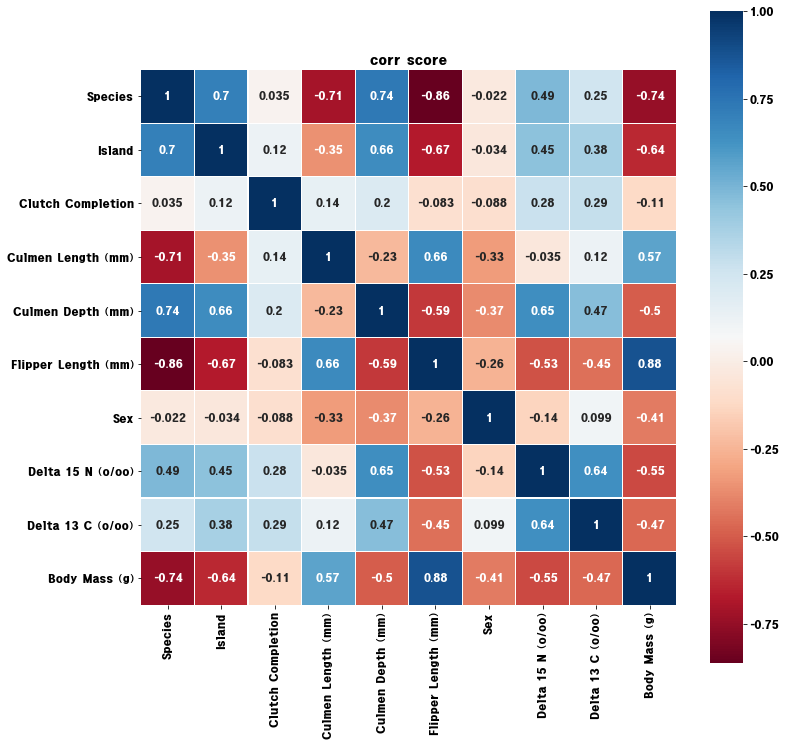

In [156]:
# 연관성이 없는 변수들 제거한 후 전체변수 시각화
colormap = plt.cm.RdBu
plt.figure(figsize = (12, 12))
plt.title('corr score')
sns.heatmap(train.corr(), linewidth = 0.1, vmax = 1.0, square = True, \
            cmap = colormap, linecolor = 'white', annot = True, annot_kws = {'size' : 10})

In [170]:
# 'Species', 'Island', 'Clutch Completion', 'Sex'
# 질적 변수들을 모두 명목변수로, target을 연속 변수로 보고 연관성 테스트
# 크루스칼 왈리스 검정 실시 # 등분산성 및 정규성 검정은 미실시
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# p-value가 0.05이하이므로 귀무가설(관계가 없다)기각 - Species는 관계가 있음
print('Species:', stats.kruskal(train[train.Species == 0]['Body Mass (g)'],\
              train[train.Species == 1]['Body Mass (g)'], train[train.Species == 2]['Body Mass (g)']))

# p-value가 0.05이하이므로 귀무가설(관계가 없다)기각 - Island는 관계가 있음
print('Island:', stats.kruskal(train[train.Island == 0]['Body Mass (g)'],\
              train[train.Island == 1]['Body Mass (g)'], train[train.Island == 2]['Body Mass (g)']))    

# p-value가 0.05이하이므로 귀무가설(관계가 없다)기각 - Sex는 관계가 있음
print('Sex:', stats.kruskal(train[train.Sex == 0]['Body Mass (g)'],\
              train[train.Sex == 1]['Body Mass (g)']))     

# p-value가 0.05이상이므로 귀무가설(관계가 없다)기각불가 - Clutch Completion는 관계가 없음
print('Clutch Completion:', stats.kruskal(train[train['Clutch Completion'] == 0]['Body Mass (g)'],\
              train[train['Clutch Completion'] == 1]['Body Mass (g)']))                 

Species: KruskalResult(statistic=74.20905689418457, pvalue=7.686135595024314e-17)
Island: KruskalResult(statistic=55.58402803804216, pvalue=8.512981126696448e-13)
Sex: KruskalResult(statistic=18.84151441533636, pvalue=1.4204159524530455e-05)
Clutch Completion: KruskalResult(statistic=1.350801142369641, pvalue=0.24513810885126547)


In [176]:
train.columns = ['Species', 'Island', 'Clutch Completion', 'Culmen_Length',
                 'Culmen_Depth', 'Flipper_Length', 'Sex', 'Delta_15_N',
                 'Delta_13_C', 'Body_Mass']

In [177]:
train.columns 

Index(['Species', 'Island', 'Clutch Completion', 'Culmen_Length',
       'Culmen_Depth', 'Flipper_Length', 'Sex', 'Delta_15_N', 'Delta_13_C',
       'Body_Mass'],
      dtype='object')

In [180]:
# 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols 
from statsmodels.api import OLS, add_constant
x_list = ['Culmen_Length', 'Culmen_Depth', 'Flipper_Length', 'Delta_15_N', 'Delta_13_C']
formula = 'Body_Mass~' + '+'.join(x_list)
model = OLS.from_formula(formula, data = train[x_list + ['Body_Mass']])
result = model.fit()
# print(result.params)
result.summary()
# ols = Ordinary least square(최소 자승법 : 잔차제곱합을 최소화하는 가중치 벡터를 구하는 방법)
# Df Model : 독립변수의 개수 // Df(자유도) residuals : 전체 표본개수에서 독립변수, 종속변수의 개수를 뺀 것
# intercept coef: 절편 // 독립변수 coef : 기울기
# Dep.Variable : Dependent variable = 종속변수 // Model : 모델링 방법
# R squared : 결정계수 - 전체 데이터중 해당 모델이 설명할 수 있는 데이터의 비율 = 설명력 / 값이 크면 예측이 정확(0~1)
# F-statistics : F 통계량 - 값이 크면 선형이 잘 안그려짐(0 ~ inf)
# Prob : F 통계량에 해당하는 P-value
# p-value가 0.05이상인 변수들 제거 - Delta_13_C, Culmen_Length, Culmen_Depth

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Body_Mass   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     79.67
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           8.25e-34
Time:                        17:31:03   Log-Likelihood:                -795.42
No. Observations:                 109   AIC:                             1603.
Df Residuals:                     103   BIC:                             1619.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5744.1942   2051.846     -2.800      0.006   -9813.546   -1674.842
Culmen_Length     15.5492     11.918      1.305      0.195      -8.087      39.185
Culmen_Depth      49.3127     26.025      1.895      0.061      -2.302     100.927
Flipper_Length    40.6379      5.174      7.855      0.000      30.377      50.899
Delta_15_N      -228.8319     97.069     -2.357      0.020    -421.346     -36.318
Delta_13_C       -88.4924     62.324     -1.420      0.159    -212.098      35.113
==============================================================================
Omnibus:                       15.318   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.792
Skew:                           0.816   Prob(JB):                     0.000137
Kurtosis:                       4.121   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols 
from statsmodels.api import OLS, add_constant
x_list = ['Flipper_Length', 'Delta_15_N']
formula = 'Body_Mass~' + '+'.join(x_list)
model = OLS.from_formula(formula, data = train[x_list + ['Body_Mass']])
result = model.fit()
# print(result.params)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Body_Mass   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     190.6
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           7.88e-36
Time:                        17:32:40   Log-Likelihood:                -798.55
No. Observations:                 109   AIC:                             1603.
Df Residuals:                     106   BIC:                             1611.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3236.0328   1080.509     -2.995      0.003   -5378.247   -1093.819
Flipper_Length    44.1881      2.885     15.318      0.000      38.469      49.907
Delta_15_N      -162.5223     74.156     -2.192      0.031    -309.544     -15.501
==============================================================================
Omnibus:                        6.070   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                5.494
Skew:                           0.489   Prob(JB):                       0.0641
Kurtosis:                       3.505   Cond. No.                     6.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [189]:
col_name = ['Species', 'Island', 'Clutch Completion', 'Sex']
check_list = [False] * len(col_name)
com_list = []
arr = []
def dfs(start):
    if len(arr) == 2:
        com_list.append(arr[:])
        return

    for i in range(start, len(col_name)):
        if check_list[i]:
            continue

        check_list[i] = True    
        arr.append(col_name[i])

        dfs(i)

        arr.pop()
        check_list[i] = False
dfs(0)
com_list

[['Species', 'Island'],
 ['Species', 'Clutch Completion'],
 ['Species', 'Sex'],
 ['Island', 'Clutch Completion'],
 ['Island', 'Sex'],
 ['Clutch Completion', 'Sex']]

In [193]:
# 'Species', 'Island', 'Clutch Completion', 'Sex'
# 명목변수들간 상관계수 비교
from scipy.stats import chi2_contingency
import pandas as pd 
for i in range(len(com_list)):
    globals()[f'ct{i}'] = pd.crosstab(train['Species'], train['Island'], margins = False) # margin을 True를 넣으면 빈도수의 합까지 출력해줌
    globals()[f'result{i}'] = chi2_contingency(observed = globals()[f'ct{i}'], correction=False)
    print(f"* {com_list[i][0]} & {com_list[i][1]}")
    print("chi - statistic:", globals()[f'result{i}'][0])
    print("p-value:", globals()[f'result{i}'][1]) # p-value의 값이 0.05보다 낮으면 두 변수는 독립이 아님.(귀무가설 기각) - 연관이 있음.
    if globals()[f'result{i}'][1] > 0.05:
        print(f'{com_list[i][0]} 와 {com_list[i][1]}은 서로 연관성이 없음')
    else:
        print(f'{com_list[i][0]} 와 {com_list[i][1]}은 서로 연관성이 있음')

* Species & Island
chi - statistic: 101.77215587680703
p-value: 4.1257982690897534e-21
Species 와 Island은 서로 연관성이 있음
* Species & Clutch Completion
chi - statistic: 101.77215587680703
p-value: 4.1257982690897534e-21
Species 와 Clutch Completion은 서로 연관성이 있음
* Species & Sex
chi - statistic: 101.77215587680703
p-value: 4.1257982690897534e-21
Species 와 Sex은 서로 연관성이 있음
* Island & Clutch Completion
chi - statistic: 101.77215587680703
p-value: 4.1257982690897534e-21
Island 와 Clutch Completion은 서로 연관성이 있음
* Island & Sex
chi - statistic: 101.77215587680703
p-value: 4.1257982690897534e-21
Island 와 Sex은 서로 연관성이 있음
* Clutch Completion & Sex
chi - statistic: 101.77215587680703
p-value: 4.1257982690897534e-21
Clutch Completion 와 Sex은 서로 연관성이 있음


In [ ]:
# 사용할 변수리스트
x_list = ['Flipper_Length', 'Delta_15_N', 'Species', 'Sex']